In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, geom_line, facet_wrap, theme_minimal, labs

In [104]:
df = pd.read_csv('../src/metrics_results.csv')

In [119]:
df['Precision_Diff'].describe()

count    848.000000
mean       0.027724
std        0.093298
min       -0.253197
25%       -0.033333
50%        0.025211
75%        0.081008
max        0.458791
Name: Precision_Diff, dtype: float64

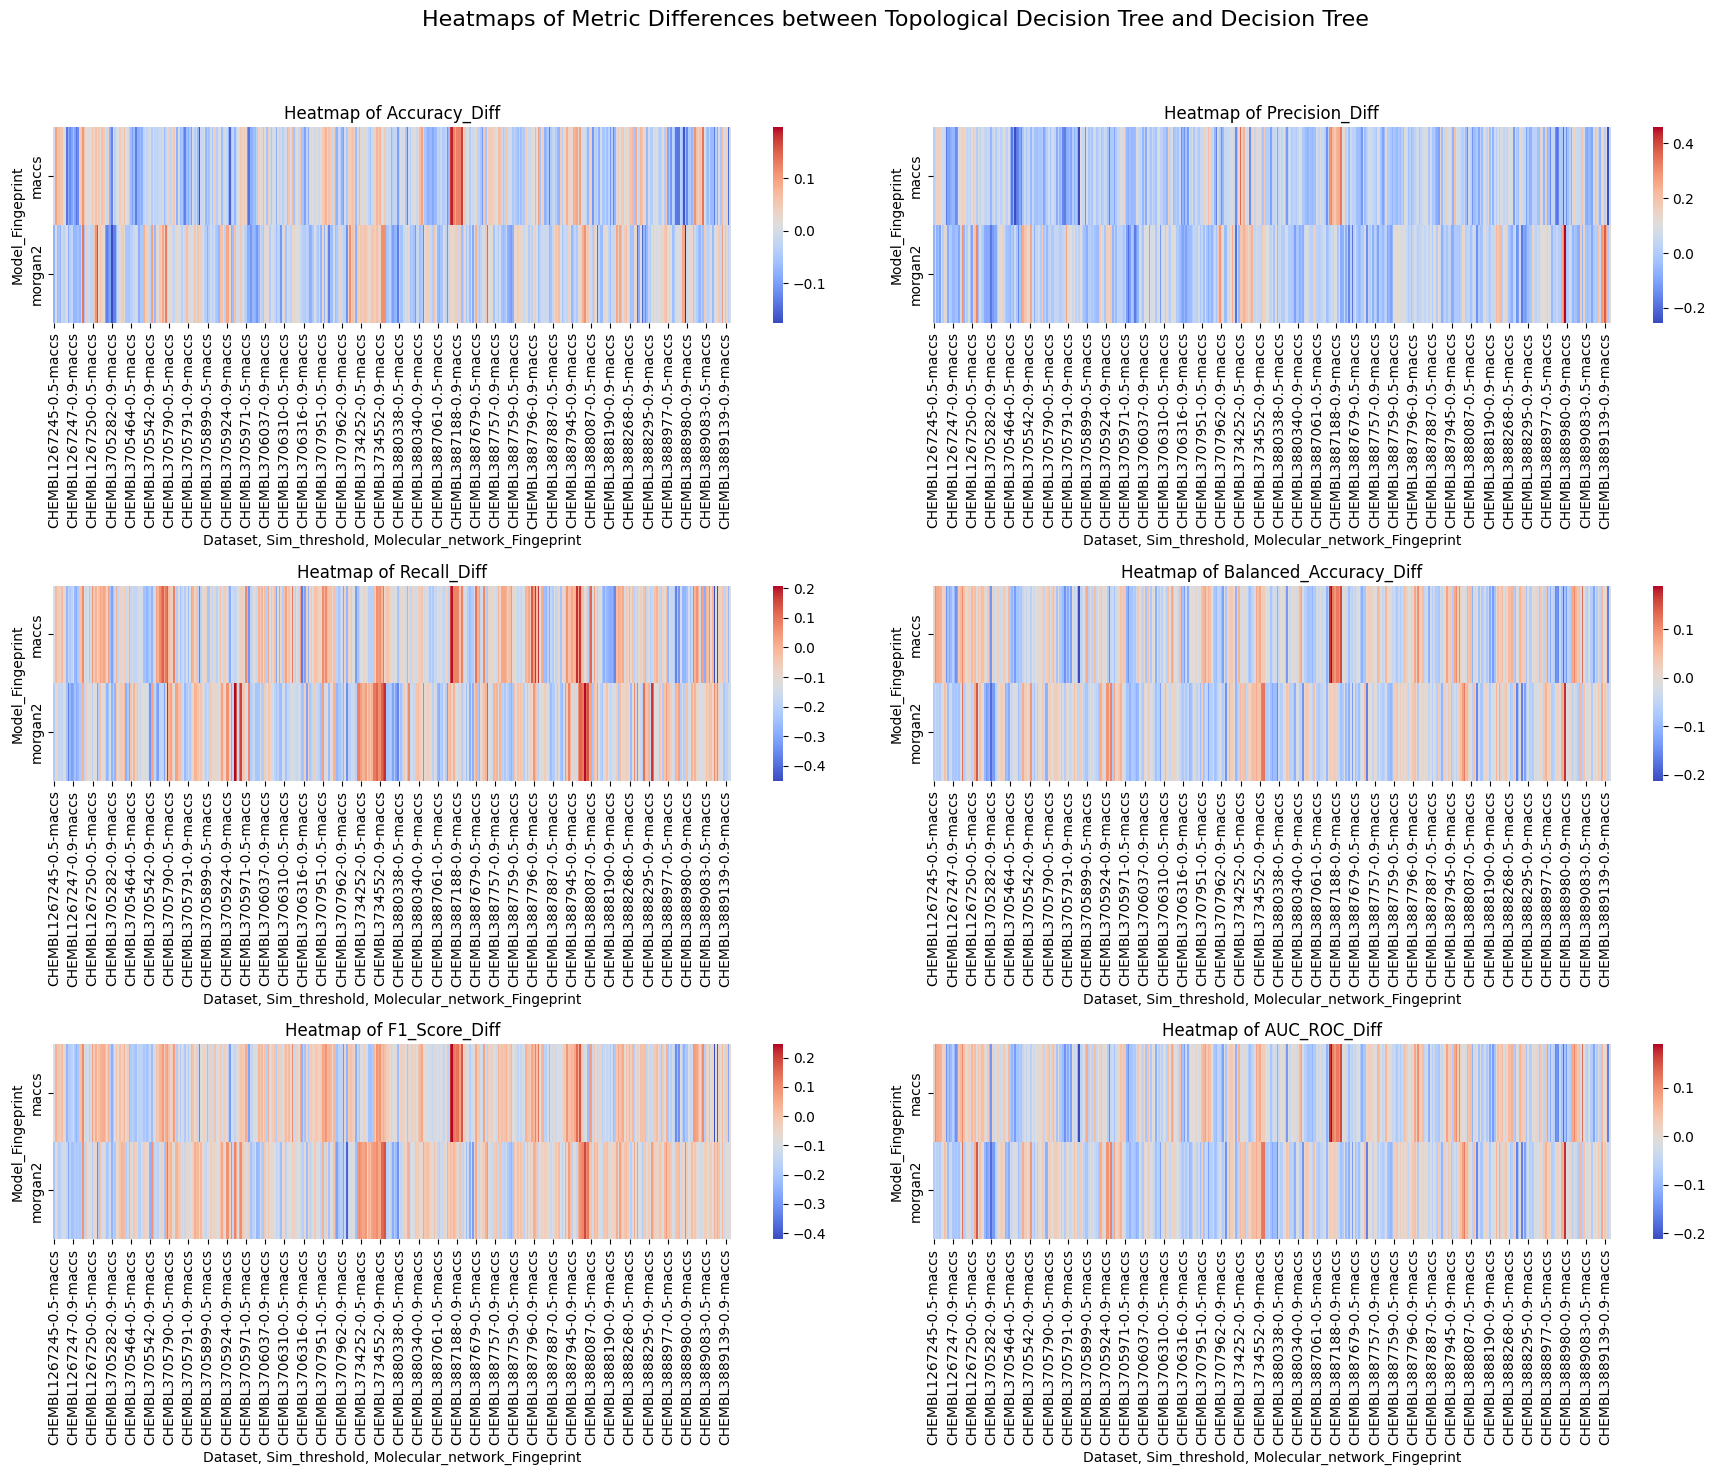

In [117]:
# Calculate differences in metrics
df['Accuracy_Diff'] = df['Topological_Decision_Tree_Accuracy'] - df['Decision_Tree_Accuracy']
df['Precision_Diff'] = df['Topological_Decision_Tree_Precision'] - df['Decision_Tree_Precision']
df['Recall_Diff'] = df['Topological_Decision_Tree_Recall'] - df['Decision_Tree_Recall']
df['Balanced_Accuracy_Diff'] = df['Topological_Decision_Tree_Balanced_Accuracy'] - df['Decision_Tree_Balanced_Accuracy']
df['F1_Score_Diff'] = df['Topological_Decision_Tree_F1_Score'] - df['Decision_Tree_F1_Score']
df['AUC_ROC_Diff'] = df['Topological_Decision_Tree_AUC_ROC'] - df['Decision_Tree_AUC_ROC']

# List of metric differences to plot
metrics = ['Accuracy_Diff', 'Precision_Diff', 'Recall_Diff', 'Balanced_Accuracy_Diff', 'F1_Score_Diff', 'AUC_ROC_Diff']

# Create a single figure with multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
fig.suptitle('Heatmaps of Metric Differences between Topological Decision Tree and Decision Tree', fontsize=16)

# Group the data by the relevant columns and calculate mean differences
grouped = df.groupby(['Dataset', 'Sim_threshold', 'Molecular_network_Fingeprint', 'Model_Fingeprint']).mean().reset_index()

# Iterate over metrics and axes
for i, metric in enumerate(metrics):
    # Determine row and column index
    row = i // 2
    col = i % 2
    
    # Create a pivot table for the heatmap
    pivot_table = grouped.pivot_table(index='Model_Fingeprint', columns=['Dataset', 'Sim_threshold', 'Molecular_network_Fingeprint'], values=metric)
    
    # Plot the heatmap on the corresponding subplot
    sns.heatmap(pivot_table, annot=False, cmap='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(f'Heatmap of {metric}')
    axes[row, col].set_xlabel('Dataset, Sim_threshold, Molecular_network_Fingeprint')
    axes[row, col].set_ylabel('Model_Fingeprint')

# Adjust layout for better viewing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [88]:
df.groupby(['Dataset', 'Sim_threshold', 'Molecular_network_Fingeprint', 'Model_Fingeprint'])

In [89]:
df

,Dataset,Sim_threshold,Molecular_network_Fingeprint,Model_Fingeprint,Topological_Decision_Tree_Accuracy,Topological_Decision_Tree_Precision,Topological_Decision_Tree_Recall,Topological_Decision_Tree_Balanced_Accuracy,Topological_Decision_Tree_F1_Score,Topological_Decision_Tree_AUC_ROC,...,Decision_Tree_F1_Score,Decision_Tree_AUC_ROC,Accuracy_Diff,Precision_Diff,Recall_Diff,Balanced_Accuracy_Diff,F1_Score_Diff,AUC_ROC_Diff,Precision_Difference,Is_Topological_Higher
0,CHEMBL3888190,0.50,maccs,maccs,0.678571,0.742857,0.490566,0.669012,0.590909,0.669012,...,0.732143,0.734250,-0.053571,0.047942,-0.283019,-0.065238,-0.141234,-0.065238,0.047942,True
1,CHEMBL3888190,0.50,morgan2,maccs,0.714286,0.818182,0.509434,0.703870,0.627907,0.703870,...,0.722222,0.732331,-0.017857,0.109091,-0.226415,-0.028462,-0.094315,-0.028462,0.109091,True
2,CHEMBL3888190,0.50,maccs,morgan2,0.803571,0.878049,0.679245,0.797250,0.765957,0.797250,...,0.770642,0.777582,0.026786,0.128049,-0.113208,0.019667,-0.004685,0.019667,0.128049,True
3,CHEMBL3888190,0.50,morgan2,morgan2,0.785714,0.871795,0.641509,0.778382,0.739130,0.778382,...,0.759259,0.768148,0.017857,0.126340,-0.132075,0.010233,-0.020129,0.010233,0.126340,True
4,CHEMBL3888190,0.70,maccs,maccs,0.678571,0.742857,0.490566,0.669012,0.590909,0.669012,...,0.733945,0.741765,-0.062500,0.028571,-0.264151,-0.072753,-0.143036,-0.072753,0.028571,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,CHEMBL1267247,0.90,morgan2,morgan2,0.552941,0.560000,0.341463,0.545732,0.424242,0.545732,...,0.600000,0.622228,-0.070588,-0.055385,-0.243902,-0.076497,-0.175758,-0.076497,-0.055385,False
844,CHEMBL1267247,0.95,maccs,maccs,0.552941,0.560000,0.341463,0.545732,0.424242,0.545732,...,0.666667,0.692073,-0.141176,-0.142703,-0.292683,-0.146341,-0.242424,-0.146341,-0.142703,False
845,CHEMBL1267247,0.95,morgan2,maccs,0.588235,0.625000,0.365854,0.580654,0.461538,0.580654,...,0.657534,0.701774,-0.117647,-0.125000,-0.219512,-0.121120,-0.195996,-0.121120,-0.125000,False
846,CHEMBL1267247,0.95,maccs,morgan2,0.564706,0.590909,0.317073,0.556264,0.412698,0.556264,...,0.617284,0.634424,-0.070588,-0.034091,-0.292683,-0.078160,-0.204586,-0.078160,-0.034091,False


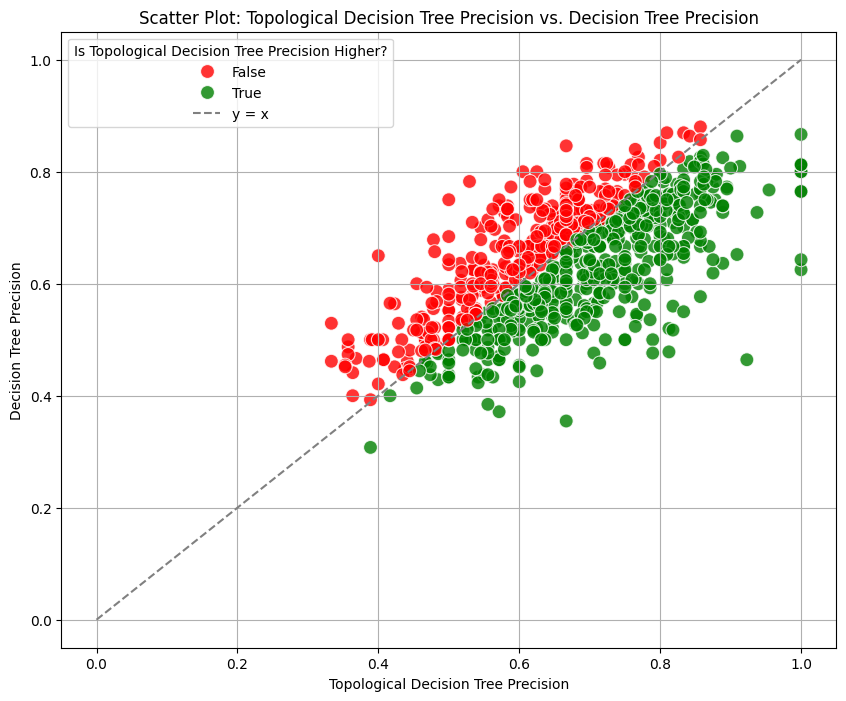

In [55]:

# Calculate whether Topological_Decision_Tree_Precision is higher than Decision_Tree_Precision
df['Is_Topological_Higher'] = df['Topological_Decision_Tree_Precision'] > df['Decision_Tree_Precision']

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot data points with color based on whether Topological Decision Tree Precision is higher
scatter = sns.scatterplot(
    x='Topological_Decision_Tree_Precision',
    y='Decision_Tree_Precision',
    hue='Is_Topological_Higher',
    palette={True: 'green', False: 'red'},
    data=df,
    alpha=0.8,
    edgecolor='w',
    s=100  # Adjust point size as needed
)

# Plot a diagonal line (y = x) to represent equal precision values
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='y = x')

# Customize the plot
plt.title('Scatter Plot: Topological Decision Tree Precision vs. Decision Tree Precision')
plt.xlabel('Topological Decision Tree Precision')
plt.ylabel('Decision Tree Precision')
plt.legend(loc='upper left', title='Is Topological Decision Tree Precision Higher?')
plt.grid(True)

# Show the plot
plt.show()

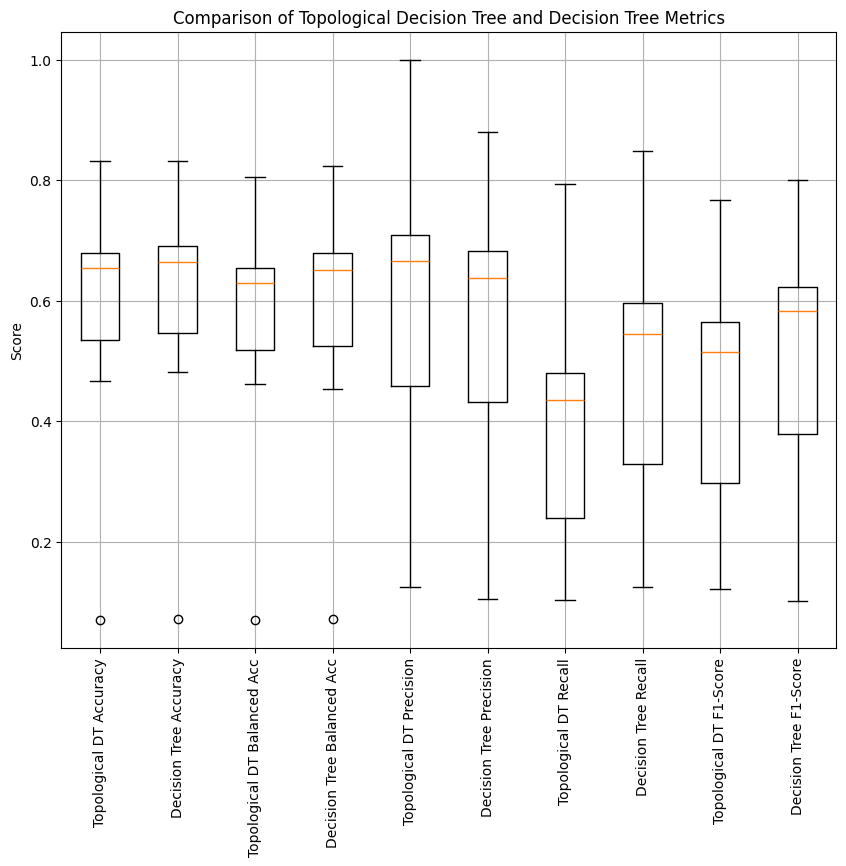

In [61]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot boxplots for the metrics
ax.boxplot([
    data["Topological_Decision_Tree_Accuracy"],
    data["Decision_Tree_Accuracy"],
    data["Topological_Decision_Tree_Balanced_Accuracy"],
    data["Decision_Tree_Balanced_Accuracy"],
    data["Topological_Decision_Tree_Precision"],
    data["Decision_Tree_Precision"],
    data["Topological_Decision_Tree_Recall"],
    data["Decision_Tree_Recall"],
    data["Topological_Decision_Tree_F1_Score"],
    data["Decision_Tree_F1_Score"]
], labels=[
    "Topological DT Accuracy", "Decision Tree Accuracy",
    "Topological DT Balanced Acc", "Decision Tree Balanced Acc",
    "Topological DT Precision", "Decision Tree Precision",
    "Topological DT Recall", "Decision Tree Recall",
    "Topological DT F1-Score", "Decision Tree F1-Score"
])

# Customize plot
ax.set_title("Comparison of Topological Decision Tree and Decision Tree Metrics")
ax.set_ylabel("Score")
ax.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()